<a href="https://colab.research.google.com/github/codiak/DTSA-5511/blob/main/DTSA_5511_Kaggle_PCam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: Set up and import the "Histopathologic Cancer Detection" data from Kaggle, and include initial Exploratory Data Analysis.

# Import necessary libraries
!pip install kaggle
import os
import pandas as pd
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.model_selection import train_test_split

In [21]:
!pip install tensorflow-io
import tensorflow_io as tfio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 28.2 MB/s eta 0:00:00


## Fetch Data

In [2]:
!mkdir -p ~/.kaggle
!cp /kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c histopathologic-cancer-detection

100% 6.31G/6.31G [05:03<00:00, 24.8MB/s]
100% 6.31G/6.31G [05:03<00:00, 22.3MB/s]


In [3]:
!unzip histopathologic-cancer-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: train/fa2ebf31ff5954570526d4835ac5368fabc1f035.tif  
  inflating: train/fa2efd2dda5235a3e397ea0dd637ea13a78f7599.tif  
  inflating: train/fa2f1d5e86165f63c57acdf9d23521f2b8070e0c.tif  
  inflating: train/fa2ffa

In [2]:
# Load train labels
train_df = pd.read_csv("train_labels.csv")

In [ ]:
# Load sample
sample_df = pd.read_csv("sample_submission.csv")

# Exploratory Data Analysis


In [3]:
# Take a peek!
print(train_df.head())

print(train_df.describe())

                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0
               label
count  220025.000000
mean        0.405031
std         0.490899
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000


In [6]:
train_df.sample(n=10)

,id,label
56801,839af4a24857657b945c806aaf8ea1b9bd1b0f1c,1
70042,ae2c5e51c5365b50a777a378da4826f58d366da1,0
126691,ea9d30419068f1b047fdae2e376b13f1dc657208,1
124595,3ea8c0ce7c7562387d6bcf742be2c474753a4fde,0
201490,29277bcc9c7966f54840130c92927ceefe1be1b4,1
6597,3753095497bf92a1cfabe98b87c4b36b694d1d89,1
119615,bb65efaccc4c7c0389cadac35dd4b00f911adece,0
162784,eabeb302e6f8b8ad0676e10dd8b3dc65d54ad2b1,1
56760,4c239cda658d2ce8eb2dddd568960395dfef5f23,0
48629,b6c4bde878d24634cefe4ec4d3acbcfe808e056c,0


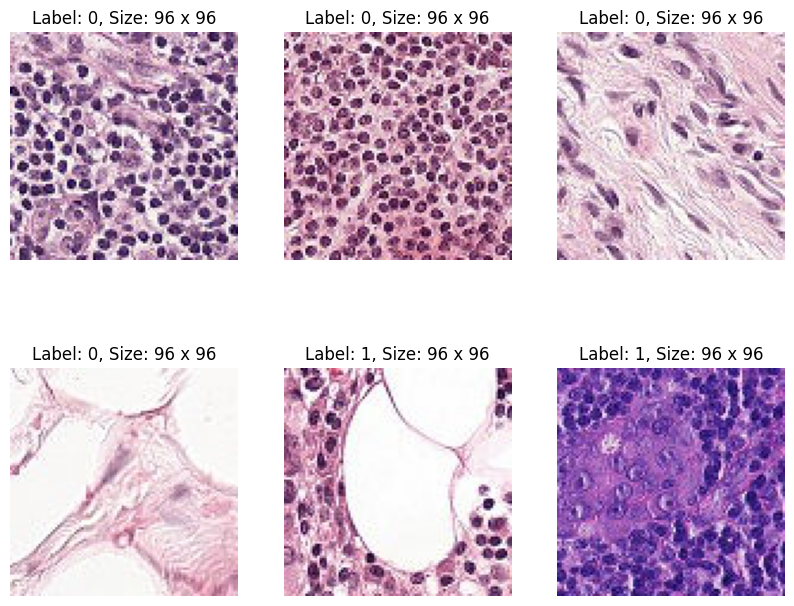

In [ ]:
# prompt: Show a sample of images from the "histopathologic-cancer-detection" dataset loaded above.

# Get a sample of images
images = train_df.sample(n=6)

# Plot the images
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
for i in range(6):
    ax = axes[i // 3, i % 3]
    image_file = f"train/{images['id'].values[i]}.tif"
    image = imread(image_file)
    ax.imshow(image, cmap="gray")
    size_label = f"{len(image)} x {len(image[0])}"
    ax.set_title(f"Label: {images['label'].values[i]}, Size: {size_label}")
    ax.axis("off")

plt.show()


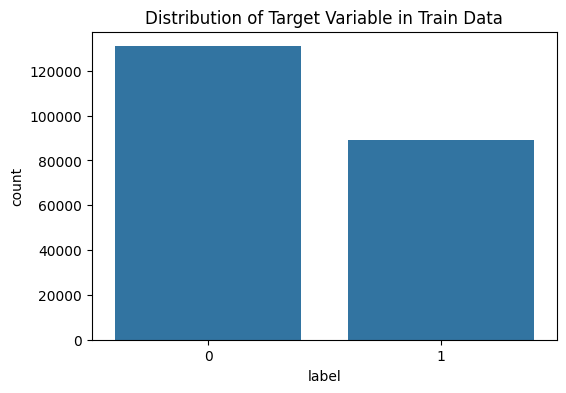

In [ ]:
# Visualize the data

# Distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title('Distribution of Target Variable in Train Data')
plt.show()

In [ ]:
# Verify all images in the /train folder are the same size (width and height dimensions).

files = os.listdir('train')
for file in files:
  image = imread(os.path.join('train', file))
  height, width = image.shape[:2]
  if height != image.shape[0] or width != image.shape[1]:
    print(f"Image {file} has different dimensions: {height} x {width}")

print("All images in the /train folder have the same dimensions")


All images in the /train folder have the same dimensions


In [81]:
# shuffle then train / test data split
train_data_df, test_data_df = train_test_split(train_df, shuffle=True, test_size=0.15)

In [91]:
# Prepare data for training
import numpy as np
from skimage.io import imread

BATCH_SIZE = 32
# BUFFER_SIZE = BATCH_SIZE * 3
train_image_ids = train_data_df['id'].values
train_labels = train_data_df['label'].values
test_image_ids = test_data_df['id'].values
test_labels = test_data_df['label'].values

base_image_path = 'train/'

def load_and_preprocess_image(image_id, label):
    # image_path = os.path.join(base_image_path, f'{image_id}.tif')
    # use tensorflow operations to maintain tensorflow graph
    image_path = tf.strings.join([base_image_path, image_id, '.tif'], separator="")
    image = tf.io.read_file(image_path)
    # image = tf.image.decode_tiff(image, channels=3)
    image = tfio.experimental.image.decode_tiff(image)
    # if image.shape[-1] == 4:
    #     image = image[:, :, :3]  # Keep only the first three channels
    # print(image.shape)
    # verified all are already 96x96
    image = tf.image.resize(image, [96, 96])
    image = image / 255.0
    return (image, label)

# example
load_and_preprocess_image(train_image_ids[0], train_labels[0])

(<tf.Tensor: shape=(96, 96, 4), dtype=float32, numpy=
 array([[[0.34901962, 0.22745098, 0.36078432, 1.        ],
         [0.3764706 , 0.23529412, 0.38431373, 1.        ],
         [0.16862746, 0.00392157, 0.18431373, 1.        ],
         ...,
         [0.8980392 , 0.83137256, 0.8627451 , 1.        ],
         [0.9529412 , 0.8862745 , 0.91764706, 1.        ],
         [0.83137256, 0.7647059 , 0.7882353 , 1.        ]],
 
        [[0.28627452, 0.15294118, 0.28235295, 1.        ],
         [0.3882353 , 0.24705882, 0.3882353 , 1.        ],
         [0.34901962, 0.2       , 0.3529412 , 1.        ],
         ...,
         [0.96862745, 0.8862745 , 0.9529412 , 1.        ],
         [0.81960785, 0.7372549 , 0.79607844, 1.        ],
         [0.80784315, 0.72156864, 0.77254903, 1.        ]],
 
        [[0.37254903, 0.22745098, 0.36078432, 1.        ],
         [0.38431373, 0.23921569, 0.36862746, 1.        ],
         [0.56078434, 0.40784314, 0.5294118 , 1.        ],
         ...,
         [0.8

In [92]:
# load test
# test_images = np.array([load_and_preprocess_image(image_id) for image_id in test_image_ids])
# test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_tf_data = tf.data.Dataset.from_tensor_slices((test_image_ids, test_labels))

In [93]:
# load train
# Eats 80gb of memory and crashes!
# train_images = np.array([load_and_preprocess_image(image_id) for image_id in train_image_ids])
# train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_tf_data = tf.data.Dataset.from_tensor_slices((train_image_ids, train_labels))

In [94]:
# Process test data
test_tf_data = test_tf_data.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_tf_data = test_tf_data.batch(BATCH_SIZE)
test_tf_data = test_tf_data.prefetch(tf.data.AUTOTUNE)

In [95]:
# Process train data
train_dataset = train_tf_data.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

# Training

In [10]:
# verify GPU is being used
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('No GPU device')
print('GPU at: {}'.format(device_name))

GPU at: /device:GPU:0


In [96]:
# verify image shape
for images, labels in train_dataset.take(1):  # Just checking the first batch
    print(images[0].shape)
    assert images.shape[1:] == (img_size, img_size, 3), "Input images are not of shape (96, 96, 3)"

(96, 96, 4)


AssertionError: Input images are not of shape (96, 96, 3)

In [97]:
# model settings
img_size = 96
classes = 1

def model_setup():
    model = tf.keras.models.Sequential()
    # start feature extraction
    # Based on the VGGNet architecture
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(img_size, img_size, 3)))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(img_size, img_size, 3)))
    model.add(tf.keras.layers.MaxPool2D())
    # second convolutional section
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.MaxPool2D())
    # end of feature extraction
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    # sigmoid is better for binary classification
    model.add(tf.keras.layers.Dense(units=classes, activation='sigmoid'))
    return model


def model_compile(model, learning_rate):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [98]:
# build model
modelA = model_setup()
modelA = model_compile(modelA, learning_rate=0.001)

In [99]:
# Training!
modelA = modelA.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
5845/5845 [==============================] - ETA: 0s - loss: 0.4023 - accuracy: 0.8213

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 96, 96, 4), found shape=(None, 96, 96, 3)
